In [18]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt


In [19]:
df= pd.read_csv('train.csv')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [20]:
import pandas as pd

# 날짜 형식 변환
# pd.to_datetime: 문자열 형식의 날짜를 datetime으로 반환
# format='%d/%m/%Y': 입력되는 날짜 문자열의 형식을 지정

df['Date2'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# 날짜 오름차순 정렬(sort)
# 내림차순으로 정렬하고 싶으면 (sorted)

df = df.sort_values(by='Date2')

# 연도 칼럼 생성
df['Year'] = df['Date2'].dt.year

# 선 그래프용 데이터셋 생성
# 2018년 데이터만 필터링
df_line = df[df['Year'] == 2018]

# 2018년 일별 매출액 가공
df_line = df_line.groupby('Date2')['Sales'].sum().reset_index()

df_line.head()


,Date2,Sales
0,2018-01-01,1481.828
1,2018-01-02,2079.554
2,2018-01-03,2070.272
3,2018-01-06,33.740
4,2018-01-07,3395.590


<Axes: xlabel='Date2'>

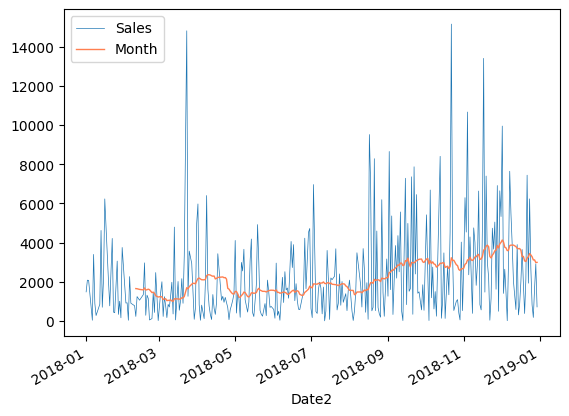

In [21]:
#30일 이동평균 생성

df_line['Month'] = df_line['Sales'].rolling(window=30).mean()

#선 그래프 시각화
ax= df_line.plot(x='Date2', y='Sales',linewidth = '0.5')
df_line.plot(x='Date2', y='Month', color='#FF7F50',linewidth='1',ax=ax)

In [22]:
#연도별 판매량 데이터 가공

df_bar_1= df.groupby('Year')['Sales'].sum().reset_index()

#df_bar_!: 특정 조건건에 따라 데이터를 필터링 하고, 그룹화하여 집계한 데이터 프레임

df_bar_1.head()



,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


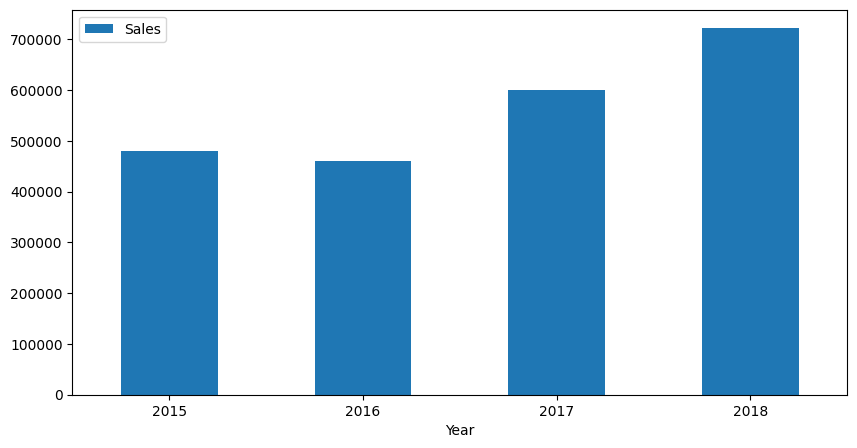

In [23]:
#막대그래프 시각화

ax=df_bar_1.plot.bar(x='Year',y='Sales', rot=0, figsize=(10,5))

#plot.bar: 막대그래프 생성
#rot: 글자으 각도
#figsize(10,5): 그래프의 크기를 가로 10인치, 세로 5인치로 설정

In [26]:
#연도별, 고객 세그먼트 별 매출액 데이터 가공

df_bar_2 = df.groupby(['Year','Segment'])['Sales'].sum().reset_index()

#고객 세그먼트를 칼럼으로 피벗

#피벗 테이블: 데이터를 요약하고 분석하기 위해 사용하는 도구(엑셀)
#데이터 요약: 데이터를 그룹화하고 합계, 평균, 개수 등 다양한 방식으로 요약할 수 있음, EX) 매출 데이터를 월별로 요약하거나, 제품별로 판매량을 합산
#동적 분석: 사용자가 데이터를 드래그 앤 드롭하여 테이블의 레이아웃을 쉽게 변경할 수 있어, 다양한 관점에서 데이터를 분석할 수 있습니다.
#필터링 및 정렬: 피벗 테이블은 특정 조건에 따라 데이터를 필터링하고 정렬할 수 있어, 필요한 정보를 빠르게 찾을 수 있습니다.
#자동 업데이트: 원본 데이터가 변경되면 피벗 테이블도 자동으로 업데이트되어 최신 데이터를 반영합니다.

df_bar_2_pv = df_bar_2.pivot(index='Year', columns = 'Segment', values='Sales').reset_index()

df_bar_2_pv.head()

Segment,Year,Consumer,Corporate,Home Office
0,2015,262956.8006,127797.4957,89101.9118
1,2016,265356.2933,119675.5989,74404.1132
2,2017,291142.9652,204977.3178,104072.2670
3,2018,328604.4719,236043.6624,157403.8849


<Axes: xlabel='Year'>

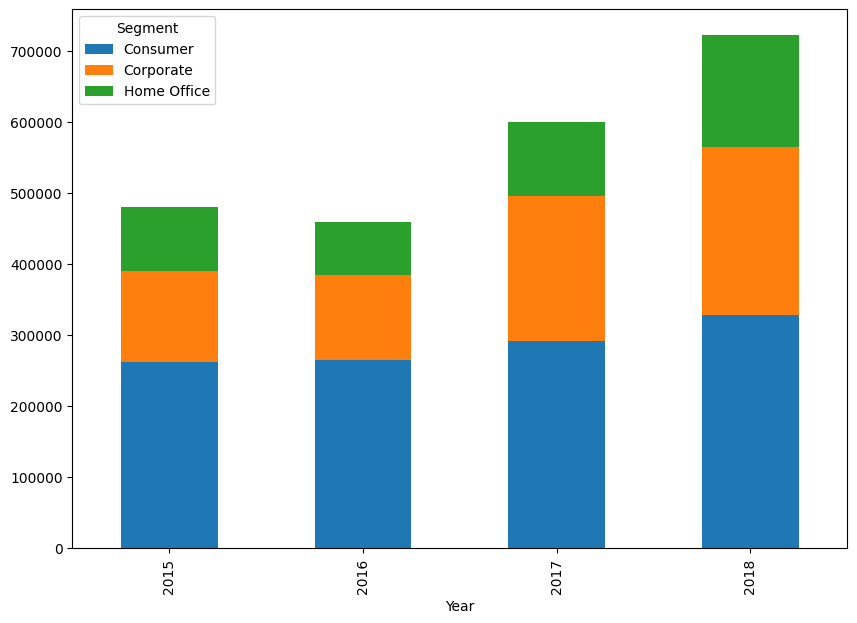

In [28]:
#연도별 고객 세그먼트별 매출액 누적 막대그래프 시각화
#stacked=True: 각 연도별로 고객 세그먼트별 매출액을 누적하여 보여줌

df_bar_2_pv.plot.bar(x='Year', stacked=True, figsize=(10,7))